# Projeto 01 do segundo bootcamp de Data Science Aplicada 

Olá! Seja bem vindo ao meu projeto do modulo 01 do bootcamp de DS da alura! 😊 Nesse projeto, como descrito no readme, iremos tentar analisar a taxa de mortalidade e tentar extrair insights dela. Vamos em frente!

## Carregamento inicial e analise dos valores puros

Primeiro de tudo, vamos carregar os dados e tentar identificar irregularidades neles de forma puramente matemática. Aqui, não queremos encontrar correlações ou tendencias, mas analisar se faltam dados, se eles fazem sentido, etc.  

In [37]:
import pandas as pd
import numpy as np

dados = pd.read_csv("dados\A190718189_28_143_208.csv", encoding="ISO-8859-1", 
                    skiprows = 3, sep=";", skipfooter=12,
                    thousands=".", decimal=",")
dados.head(7)

<ipython-input-37-54ea519e4038>:4: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  dados = pd.read_csv("dados\A190718189_28_143_208.csv", encoding="ISO-8859-1",


,Unidade da Federação,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,...,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,Total
0,11 Rondônia,57,99,45,43,54,47,109,114,105,...,446,476,408,293,266,360,435,333,559,37058
1,12 Acre,30,94,76,103,94,71,114,116,104,...,192,163,136,173,119,147,143,188,205,18615
2,13 Amazonas,149,243,312,320,240,270,288,284,254,...,916,657,673,609,715,607,1330,1616,1796,64963
3,14 Roraima,23,21,23,38,26,24,38,29,34,...,177,85,107,114,135,127,190,322,287,12466
4,15 Pará,543,581,655,524,622,629,742,658,767,...,1524,1762,1196,1019,1075,1068,1163,1230,1277,139591
5,16 Amapá,65,81,42,51,34,42,52,52,59,...,216,149,80,76,63,146,110,136,205,13005
6,17 Tocantins,141,210,253,199,173,216,229,202,189,...,363,333,341,299,9,14,15,4,52,33714


In [18]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Columns: 161 entries, Unidade da Federação to Total
dtypes: int64(159), object(2)
memory usage: 34.1+ KB


Ao utilizarmos o `info()`, podemos vê que existem duas colunas do tipo `object`. Uma delas podemos identificar de forma visual que trata-se da coluna `Unidade da Federação`, mas a outra significa que uma das outras colunas no tempo possui algum tipo de lixo, ou dado faltante. Para identificar qual coluna é, iremos usar o seguinte codigo:

In [35]:
dados.select_dtypes(include = object)

,Unidade da Federação,2009/Set
0,11 Rondônia,112
1,12 Acre,-
2,13 Amazonas,315
3,14 Roraima,48
4,15 Pará,801
5,16 Amapá,82
6,17 Tocantins,210
7,21 Maranhão,434
8,22 Piauí,266
9,23 Ceará,1264


Com isso, podemos identificar exatamente qual coluna possui um dado faltante. Não temos os dados de obitos do Acre em setembro de 2009! A pergunta que fica é: e como tratamos isso? A resposta, como 90% das duvidas nessa área, é depende. Dependendo de se isso for usado em um modelo, ou para uma simples analise, podemos tratar das mais diversas formas. Nesse caso específico usaremos interpolação, que, convenientemente, ja está implementada no pandas. Antes disso, é necessário fazer uma pequena mudança nessa coluna e trocar o '-' por NaN.

In [78]:
dados['2009/Set'] = dados['2009/Set'].apply(lambda x: np.NaN if x == '-' else x)

dados['2009/Set']

0      112
1      NaN
2      315
3       48
4      801
5       82
6      210
7      434
8      266
9     1264
10     452
11     696
12    1482
13     409
14     231
15    1903
16    3929
17     519
18    2644
19    9457
20    2336
21    1304
22    2895
23     478
24     389
25     768
26     420
Name: 2009/Set, dtype: object

In [83]:
dados['2009/Set'] = dados['2009/Set'].astype('float').interpolate(downcast='infer').astype('int64')
dados['2009/Set']

0      112
1      213
2      315
3       48
4      801
5       82
6      210
7      434
8      266
9     1264
10     452
11     696
12    1482
13     409
14     231
15    1903
16    3929
17     519
18    2644
19    9457
20    2336
21    1304
22    2895
23     478
24     389
25     768
26     420
Name: 2009/Set, dtype: int64

In [86]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Columns: 161 entries, Unidade da Federação to Total
dtypes: int64(160), object(1)
memory usage: 34.1+ KB


Agora, todos nossos dados são `int64`, o que faz sentido, já que obitos trata-se de contagem. Não existe 0.5 obito, por exemplo. Com isso, provavelmente, temos uma serie temporal coerente montada.

Por fim, vamos tornar nossa coluna de `Unidade da Federação` nos nossos índices, para facilitar na hora da exploração

In [87]:
dados = dados.set_index("Unidade da Federação")
dados.head(7)

,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,...,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,Total
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,
11 Rondônia,57,99,45,43,54,47,109,114,105,124,...,446,476,408,293,266,360,435,333,559,37058
12 Acre,30,94,76,103,94,71,114,116,104,77,...,192,163,136,173,119,147,143,188,205,18615
13 Amazonas,149,243,312,320,240,270,288,284,254,228,...,916,657,673,609,715,607,1330,1616,1796,64963
14 Roraima,23,21,23,38,26,24,38,29,34,62,...,177,85,107,114,135,127,190,322,287,12466
15 Pará,543,581,655,524,622,629,742,658,767,683,...,1524,1762,1196,1019,1075,1068,1163,1230,1277,139591
16 Amapá,65,81,42,51,34,42,52,52,59,83,...,216,149,80,76,63,146,110,136,205,13005
17 Tocantins,141,210,253,199,173,216,229,202,189,164,...,363,333,341,299,9,14,15,4,52,33714


## Analise visual

Agora iremos visualizar os valores ao longo do tempo para tentarmos observar tendências. Series temporais, em geral, são um pouco mais complicadas de analisar, pois valores como média, mediana, distribuição, não influenciam muita. Os valores mudam ao longo do tempo e podem ter mudanças repentinas, então o que podemos extrair melhor é correlação entre séries e tendencias, sejam de subida, ou de descida. Abaixo, vamos trabalhar em cima disso

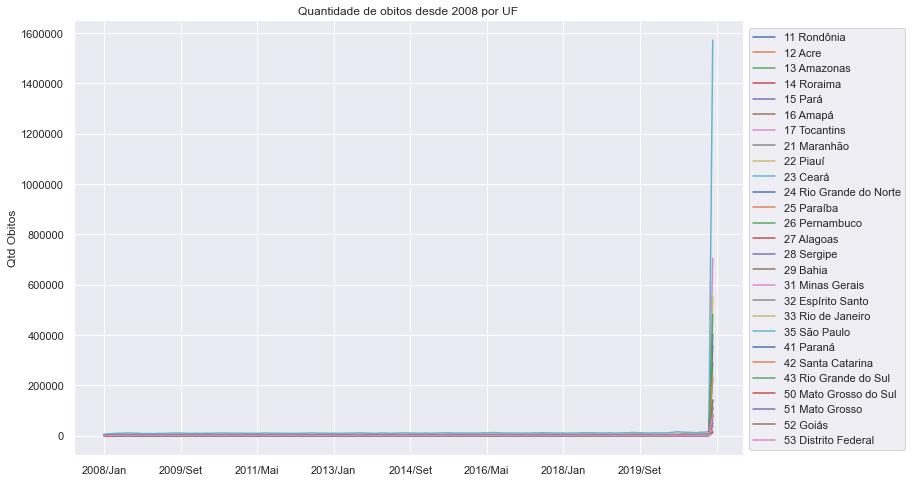

In [138]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

sns.set()

ax = dados.T.plot(figsize=(12,8))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:0.0f}"))
plt.legend(bbox_to_anchor=(1 ,0), loc='lower left', ncol=1)
ax.set_title('Quantidade de obitos desde 2008 por UF')
ax.set_ylabel('Qtd Obitos')
plt.show()

Já conseguimos identificar uma anormalidade! No final do gráfico, percebemos que existe um pico no gráfico, que causa até um problema de escala no resto dele. Vamos tentar analisar 2021 para identificar o motivo dessa disparada

In [94]:
dados.loc[:,'2021/Jan':]

,2021/Jan,2021/Fev,2021/Mar,Total
Unidade da Federação,,,,
11 Rondônia,435,333,559,37058
12 Acre,143,188,205,18615
13 Amazonas,1330,1616,1796,64963
14 Roraima,190,322,287,12466
15 Pará,1163,1230,1277,139591
16 Amapá,110,136,205,13005
17 Tocantins,15,4,52,33714
21 Maranhão,1057,1148,1800,113499
22 Piauí,675,665,697,75742


O motivo na verdade era mais simples do que imaginavamos. A coluna `Total`, que corresponde ao somatorio de obitos registrados durante 2008 até Março de 2021, estava sendo incluso no plot. Vamos retirar para obtermos um gráfico melhor.

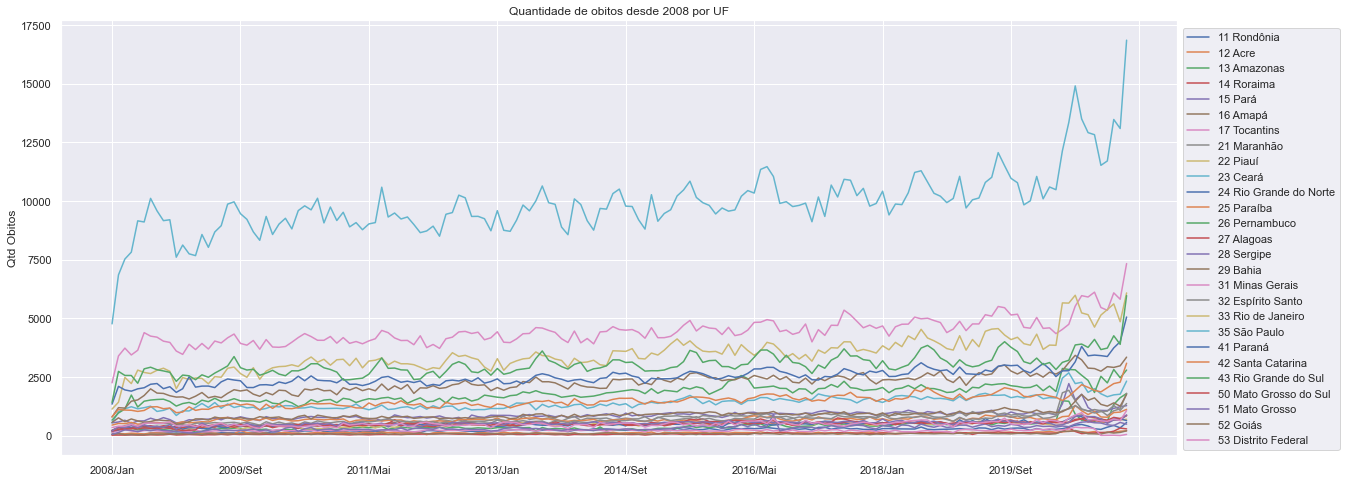

In [139]:
plot_data = dados.drop('Total', axis=1).T

ax = plot_data.plot(figsize=(20,8))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:0.0f}"))
plt.legend(bbox_to_anchor=(1 ,0), loc='lower left', ncol=1)
ax.set_title('Quantidade de obitos desde 2008 por UF')
ax.set_ylabel('Qtd Obitos')
plt.show()

Agora temos uma visualização melhor! Podemos identificar que existe uma estado que se destaca dos demais. Como temos muitas linhas, acaba que nossa legenda está repetindo cores, então esse estado pode ser ou o Ceará ou São Paulo. Analisando o valor da coluna `Total`, podemos presumir que trata-se de São Paulo, por ter um valor muito superior que os outros estados. Para confirmar, vamos plotar apenas São Paulo.

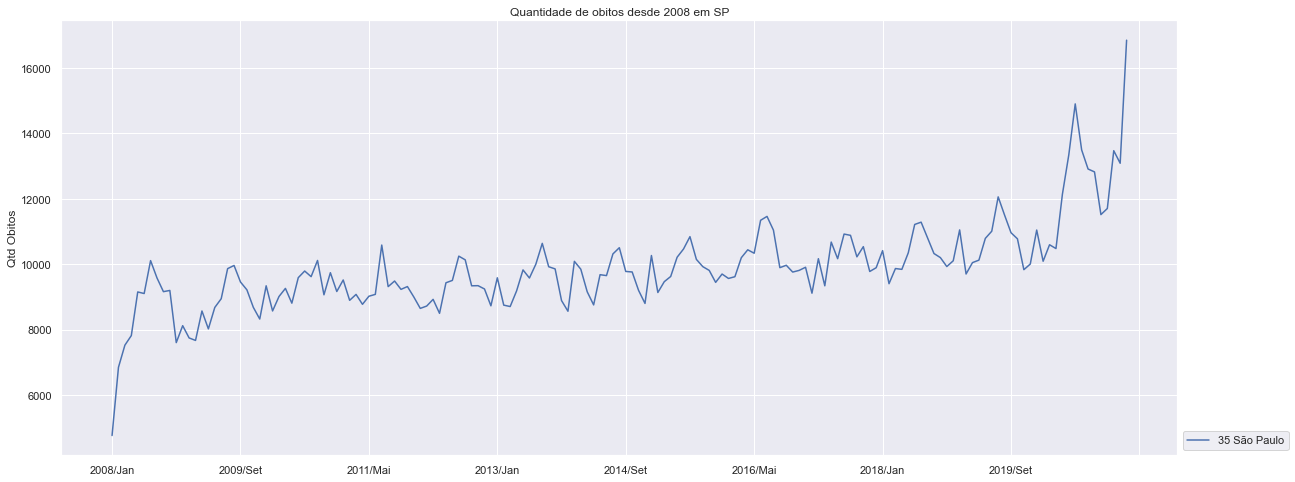

In [140]:
ax = plot_data['35 São Paulo'].plot(figsize=(20,8))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:0.0f}"))
plt.legend(bbox_to_anchor=(1 ,0), loc='lower left', ncol=1)
ax.set_title('Quantidade de obitos desde 2008 em SP')
ax.set_ylabel('Qtd Obitos')
plt.show()

Ao compararmos os valores utilizando os eixos, confirmamos que de fato trata-se de são paulo. Por ser muito maior que os outros estados, um comparativo dos outros estados tirando São Paulo torna-se interessante. Vamos faze-lo!

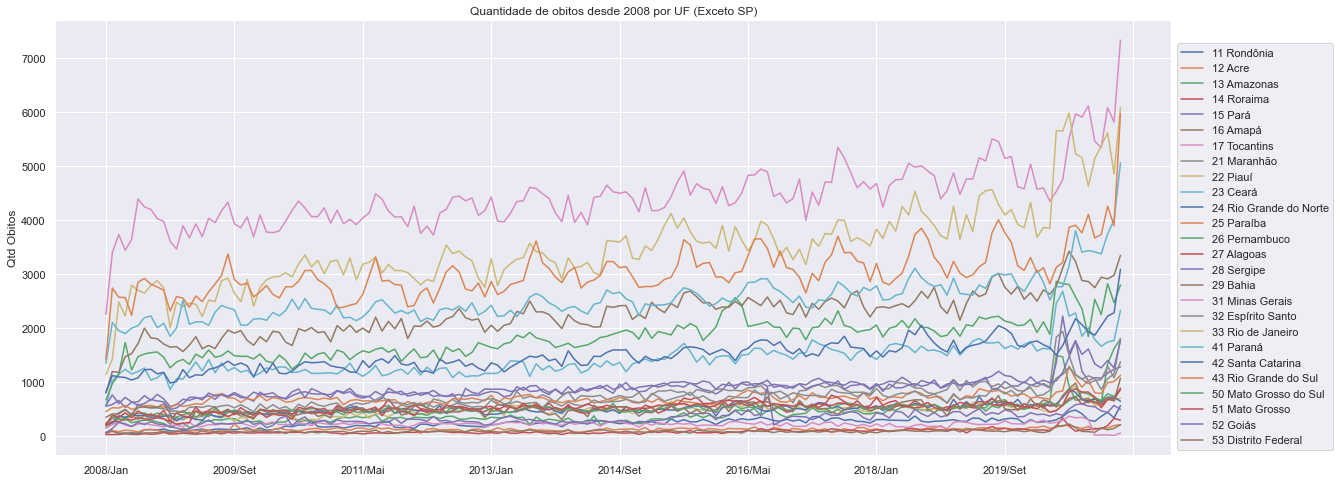

In [213]:
ax = plot_data.drop('35 São Paulo', axis=1).plot(figsize=(20,8))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:0.0f}"))
plt.legend(bbox_to_anchor=(1 ,0), loc='lower left', ncol=1)
ax.set_title('Quantidade de obitos desde 2008 por UF (Exceto SP)')
ax.set_ylabel('Qtd Obitos')
plt.show()

Assim fica bem mais fácil de comparar! Podemos percever que, em geral, os dados seguem um padrão bem similar, provavelmente indicando que são bem correlacionados. Além disso, é possível identificar uma tendencia de aumento ao longo do tempo! Outro fato interessante é como as linhas ficam 'caóticas' no ano de 2021. Isso pode se dar a que os dados ainda não estão devidamente colocados no sistema, causando esse tipo de ruído.


## Analise do último Mês

Agora, após uma comparação mais geral entre os estados, vamos comparar como os estados foram no último mês registrado (2021/Mar)

In [209]:
obitos_mar_2021 = dados['2021/Mar'].sort_values(ascending=False)
obitos_mar_2021

Unidade da Federação
35 São Paulo              16850
31 Minas Gerais            7331
33 Rio de Janeiro          6081
43 Rio Grande do Sul       5966
41 Paraná                  5054
29 Bahia                   3344
42 Santa Catarina          3086
26 Pernambuco              2794
23 Ceará                   2323
21 Maranhão                1800
13 Amazonas                1796
52 Goiás                   1758
32 Espírito Santo          1367
15 Pará                    1277
25 Paraíba                 1120
53 Distrito Federal        1066
51 Mato Grosso              882
50 Mato Grosso do Sul       865
27 Alagoas                  851
22 Piauí                    697
24 Rio Grande do Norte      639
11 Rondônia                 559
28 Sergipe                  489
14 Roraima                  287
12 Acre                     205
16 Amapá                    205
17 Tocantins                 52
Name: 2021/Mar, dtype: int64

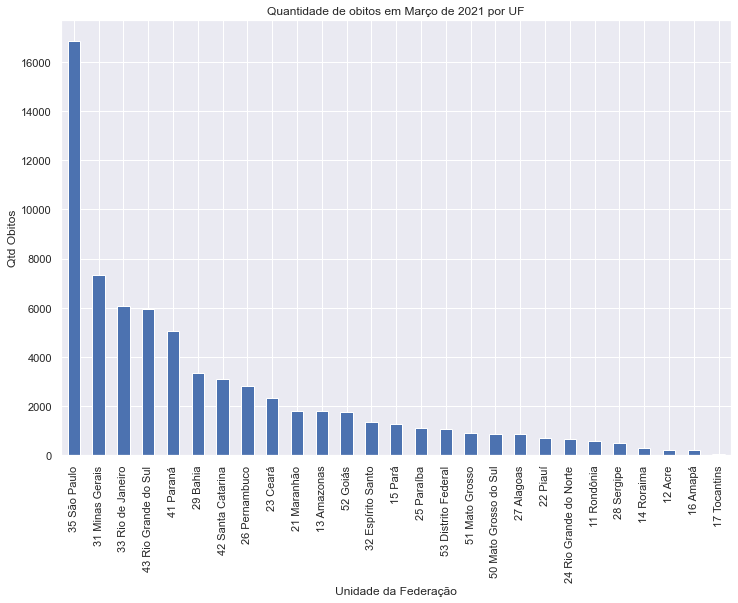

In [214]:
ax = obitos_mar_2021.plot(kind='bar', figsize=(12,8))
ax.set_title('Quantidade de obitos em Março de 2021 por UF')
ax.set_ylabel('Qtd Obitos')
plt.show()

É fácil visualizar pelo gráfico e pelo valor o quão discrepante é São Paulo do resto do brasil. Parte disso é por conta também de sua densidade populacional elevada. Isso pode inclusive causar uma falsa noção de distorção, entre São Paulo e o resto do Brasil. Vamos conferir se isso ocorre mesmo pegando a população estimada das UFs e dividindo quantidade de obitos por ela! Para tal, vamos usar uma estimativa da população em 2020 por UF obtida pelo [site do IBGE](https://sidra.ibge.gov.br/tabela/6579#resultado).

P.S: Os dados de estimativa de 2021 provavelmente não estão disponibilizados pois, além do ano está em curso ainda, esse ano deveria ocorrer o Censo 2021 do IBGE, que foi cancelado pelo ministerio da economia alegando falta de verba. :/ Uma pena que, na era dos dados, isso não seja uma prioridade...

In [225]:
pop_uf = pd.read_excel('dados\popestim_uf.xlsx',index_col=0, skiprows = 3, skipfooter=1)
pop_uf.columns = ['População Estimada']
pop_uf

,População Estimada
Unidade da Federação,
Rondônia,1796460
Acre,894470
Amazonas,4207714
Roraima,631181
Pará,8690745
Amapá,861773
Tocantins,1590248
Maranhão,7114598
Piauí,3281480


In [241]:
# obitos_mar_2021.reset_index()['Unidade da Federação'].apply(lambda x: ' '.join(x.split(' ')[1:]))
temp = obitos_mar_2021.reset_index()
temp['Unidade da Federação'] = temp['Unidade da Federação'].apply(lambda x: ' '.join(x.split(' ')[1:]))
temp = temp.set_index('Unidade da Federação')
obitos_mar_2021 = temp
obitos_mar_2021

,2021/Mar
Unidade da Federação,
São Paulo,16850
Minas Gerais,7331
Rio de Janeiro,6081
Rio Grande do Sul,5966
Paraná,5054
Bahia,3344
Santa Catarina,3086
Pernambuco,2794
Ceará,2323


In [248]:
merged = obitos_mar_2021.merge(pop_uf, on='Unidade da Federação')
merged['Taxa de mortalidade'] = (merged['2021/Mar'] * 10000 ) / merged['População Estimada']
merged.sort_values('Taxa de mortalidade', ascending=False)['Taxa de mortalidade']

Unidade da Federação
Rio Grande do Sul      5.222808
Roraima                4.547032
Paraná                 4.388357
Amazonas               4.268351
Santa Catarina         4.255083
São Paulo              3.640148
Rio de Janeiro         3.501632
Distrito Federal       3.489192
Minas Gerais           3.442970
Espírito Santo         3.363638
Rondônia               3.111675
Mato Grosso do Sul     3.078956
Pernambuco             2.905386
Paraíba                2.772773
Alagoas                2.539129
Maranhão               2.530009
Ceará                  2.528545
Mato Grosso            2.501262
Goiás                  2.471343
Amapá                  2.378817
Acre                   2.291860
Bahia                  2.239691
Piauí                  2.124042
Sergipe                2.108829
Rio Grande do Norte    1.808065
Pará                   1.469379
Tocantins              0.326993
Name: Taxa de mortalidade, dtype: float64

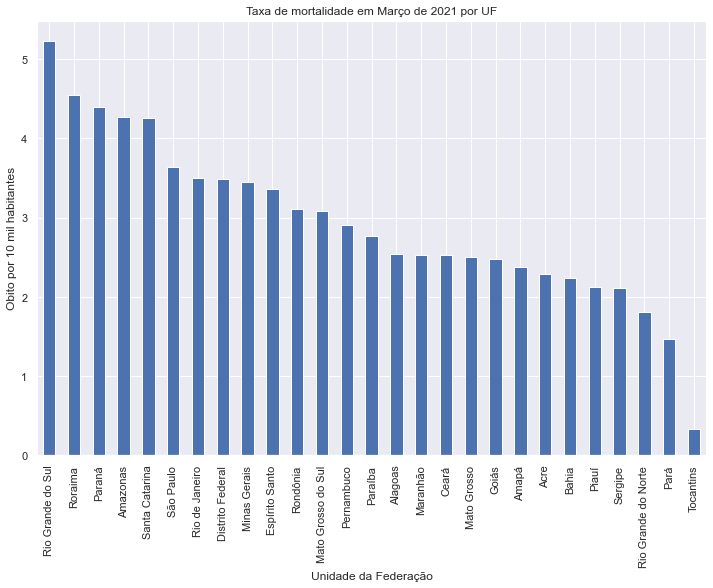

In [250]:
ax = merged.sort_values('Taxa de mortalidade', ascending=False)['Taxa de mortalidade'].plot(kind='bar', figsize=(12,8))
ax.set_title('Taxa de mortalidade em Março de 2021 por UF')
ax.set_ylabel('Obito por 10 mil habitantes')
plt.show()

Voilá! Entenderam? Vou explicar!

Primeiramente, obtemos os dados da população estimada de 2020. Vamos assumir que isso é constante durante o tempo, o que não é verdade, mas é o mais proximo que vamos conseguir chegar com os dados disponibilizados. Dessa forma foi pegue a quantidade de obitos em Março de 2021, dividido pela população geral e multiplicado por 10000. Isso é conhecido como **Taxa de mortalidade**, e coincidentemente é um dos parâmetros que tem lá no site do datasus também! O cálculo é realizado da seguinte forma: (Quantidade de obitos no periodo / População total na metade do período) * 10^n, onde n pode ser qualquer valor inteiro positivo. Dessa forma, podemos ter uma métrica mais coerente de comparação entre os estados. E quando fazemos isso, podemos ver que São paulo não é tão discrepante assim do resto do Brasil. E vejam! Roraima, que é um dos que tem menos óbitos de forma absoluta, acaba se tornando um dos estados com maior taxa de mortalidade no periodo.

Fonte do calculo da taxa da mortalidade -> [Epidemiologia Basica, 2ª edição](https://edisciplinas.usp.br/pluginfile.php/4338965/mod_resource/content/1/BONITA%20et%20al%20-%20cap%202.pdf)